### One dimensional polynomial test

Eigenvalues: 	[0.32608995 4.3441941 ]
beta OLS: 	[[3.96557579 2.99046008]]
Beta Grad: 	[[3.96557579 2.99046008]]


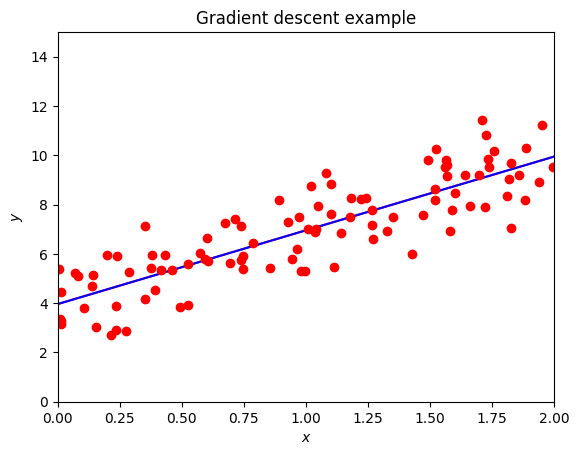

In [38]:
# One dimensional polynomial test
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys

n = 100
x = 2*np.random.rand(n,1)
y = 4 + 3*x +np.random.randn(n,1)

# Building feature matrix
X = np.c_[np.ones((n,1)), x]
# Hessian matrix
H = (2.0/n) * X.T @ X
# Get the eigenvalues
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues: \t{EigValues}") # --> we use this to determine the best values for the Learning Rate (eta)

# beta with OLS computation
beta_linreg = np.linalg.inv(X.T @ X) @ X.T @ y
print(f'beta OLS: \t{beta_linreg.T}')

# beta with Gradient
beta = np.random.rand(2,1)

# Learning Rate and Number of Iterations
eta = 1.00 / np.max(EigValues) # --> inverse of the Eigenvalues
Niterations = 1000

# Gradient execution
for iter in range(Niterations):
    gradient = (2.0/n) * X.T @ (X @ beta - y)
    beta -= eta * gradient
    
print(f'Beta Grad: \t{beta.T}')

# new points
xnew = np.array([[0], [2]])
xbnew = np.c_[np.ones((2,1)), xnew]
# prediction with gradient
ypredict = xbnew.dot(beta)
ypredict2 = xbnew.dot(beta_linreg)

# Plot
plt.plot(xnew, ypredict, "r-")
plt.plot(xnew, ypredict2, "b-")
plt.plot(x, y, 'ro')
plt.axis([0, 2.0, 0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Gradient descent example')
plt.show()

Eigenvalues: 	[92.77474113  1.19292238  0.55506333]
beta OLS: 	[[1.87785233 2.85520076 1.04507946]]
Beta Grad: 	[[1.87991393 2.85130942 1.0460728 ]]


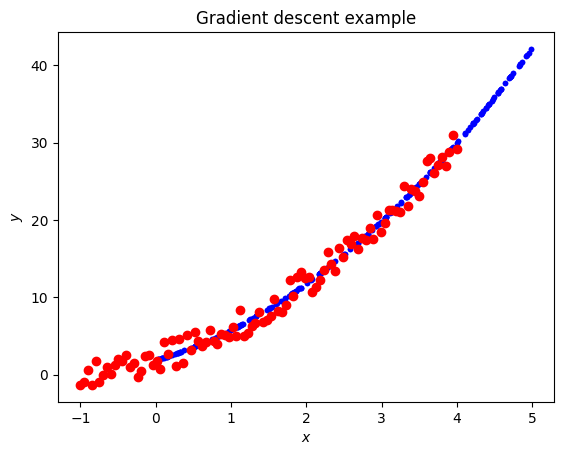

In [39]:
n = 100
x = np.linspace(-1, 4, n).reshape(-1, 1)
y = 1 * x**2 + 3 * x + 4*np.random.rand(n,1)

# Building feature matrix
X = np.c_[np.ones((n,1)), x, x**2]
# Hessian matrix
H = (2.0/n) * X.T @ X
# Get the eigenvalues
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues: \t{EigValues}") # --> we use this to determine the best values for the Learning Rate (eta)

# beta with OLS computation
beta_linreg = np.linalg.inv(X.T @ X) @ X.T @ y
print(f'beta OLS: \t{beta_linreg.T}')

# beta with Gradient
beta = np.random.rand(3,1)

# Learning Rate and Number of Iterations
eta = 1.00 / np.max(EigValues) # --> inverse of the Eigenvalues
Niterations = 1000

# Gradient execution
for iter in range(Niterations):
    gradient = (2.0/n) * X.T @ (X @ beta - y)
    beta -= eta * gradient
    
print(f'Beta Grad: \t{beta.T}')

# new points
xnew = np.random.rand(200,1) * 5
xbnew = np.c_[np.ones((200, 1)), xnew, xnew**2]
# prediction with gradient
ypredict = xbnew.dot(beta)
ypredict2 = xbnew.dot(beta_linreg)

# Plot
plt.plot(xnew, ypredict, "b.")
plt.plot(xnew, ypredict2, "b.")
plt.plot(x, y, 'ro')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Gradient descent example')
plt.show()

### GD in OLS

Eigenvalues: 	[95.6606211   1.18379665  0.52489721]
beta OLS: 	[[1.70995134 3.12293499 0.99475369]]
Beta Grad: 	[[1.7127227  3.11776718 0.99606952]]
MSE OLS: 	1.71783
MSE gd: 	1.71859


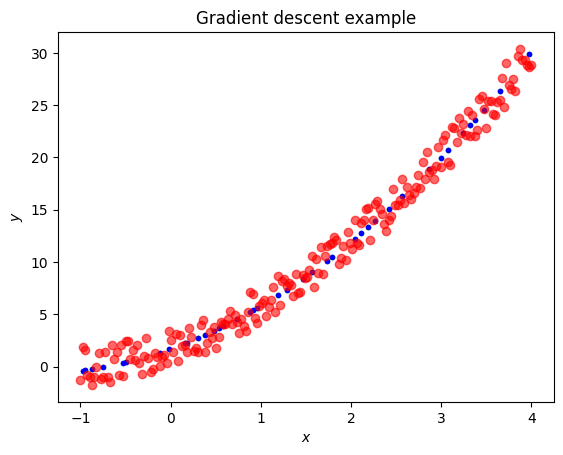

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

n = 200
x = np.linspace(-1, 4, n).reshape(-1, 1)
y = 1 * x**2 + 3 * x + 4*np.random.rand(n,1)

# Building feature matrix
X = np.c_[np.ones((n,1)), x, x**2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Hessian matrix
n = X_train.shape[0]
H = (2.0/n) * X_train.T @ X_train
# Get the eigenvalues
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues: \t{EigValues}") # --> we use this to determine the best values for the Learning Rate (eta)

# beta with OLS computation
beta_linreg = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
print(f'beta OLS: \t{beta_linreg.T}')

# beta with Gradient
beta = np.random.rand(3,1)

# Learning Rate and Number of Iterations
eta = 1.00 / np.max(EigValues) # --> inverse of the Eigenvalues
Niterations = 1000

# Gradient execution
for iter in range(Niterations):
    gradient = (2.0/n) * X_train.T @ (X_train @ beta - y_train)
    beta -= eta * gradient
    
print(f'Beta Grad: \t{beta.T}')


# prediction with gradient
ypredict = X_test @ beta
ypredict2 = X_test @ beta_linreg

mse_pred1 = mean_squared_error(y_test, ypredict)
mse_pred2 = mean_squared_error(y_test, ypredict2)
print(f'MSE OLS: \t{mse_pred2:.5f}')
print(f'MSE gd: \t{mse_pred1:.5f}')


# Plot
plt.plot(X_test[:,1], ypredict, "g.")
plt.plot(X_test[:,1], ypredict2, "b.")
plt.plot(x, y, 'ro', alpha = 0.6)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Gradient descent example')
plt.show()

In [41]:
# OLS and Ridge with GD

from random import random, seed
import numpy as np

# the number of datapoints with a 2nd-order polynomial
n = 1000
x = 2*np.random.rand(n,1)
y = 4+3*x+5*x*x

# Design matrix including the intercept
# No scaling of data of and all data used for training 
X = np.c_[np.ones((n,1)), x, x*x]
H = (2.0/n) * X.T @ X
EigValues, Eigvectors = np.linalg.eig(H)

# Learning rate and number of iterations
eta = 1.00 / np.max(EigValues) # --> Learning Rate tuned with the Hessian matrix
# eta = 0.05 # fixed learning rate 
Niterations = 100

# OLS part
beta_OLS = np.random.randn(3,1) # --> initialize
gradient = np.zeros(3)

for iter in range(Niterations):
    gradient = (2.0/n)*X.T @ (X @ beta_OLS - y)
    beta_OLS -= eta*gradient
print('Parameters for OLS using gradient descent')
print(beta_OLS)

#Ridge parameter Lambda
Lambda  = 0.01
Id = n*Lambda* np.eye((X.T @ X).shape[0])
beta_Ridge = np.random.randn(3,1)
gradient = np.zeros(3)

for iter in range(Niterations):
    gradients = 2.0/n*X.T @ (X @ beta_Ridge-y)+2*Lambda*beta_Ridge
    beta_Ridge -= eta*gradients
print('Parameters for Ridge using gradient descent')    
print(beta_Ridge)

Parameters for OLS using gradient descent
[[3.71360243]
 [3.74001404]
 [4.65433091]]
Parameters for Ridge using gradient descent
[[3.48155731]
 [4.23970261]
 [4.42234085]]


In [42]:
# OLS and Ridge with GD with Momentum

from random import random, seed
import numpy as np


n = 1000
x = 2*np.random.rand(n,1)
y = 4+3*x+5*x*x

# Design matrix
X = np.c_[np.ones((n,1)), x, x*x]
H = (2.0/n) * X.T @ X
EigValues, Eigvectors = np.linalg.eig(H)

# Learning rate and number of iterations
eta = 1.00 / np.max(EigValues)  # Learning Rate tuned with the Hessian matrix
Niterations = 100

# Momentum factor
gamma = 0.6                      # range [0.5, 0.9]

### OLS with Momentum ###
beta_OLS = np.random.randn(3,1)
gradient = np.zeros((3,1))
v = np.zeros((3,1))              # Initialize momentum vector

for iter in range(Niterations):
    gradient = (2.0/n) * X.T @ (X @ beta_OLS - y)  # Calculate gradient
    v = gamma * v + eta * gradient                 # Update momentum
    beta_OLS -= v                                  # Update parameters with momentum

print('Parameters for OLS using gradient descent with Momentum')
print(beta_OLS)

### Ridge with Momentum ###
Lambda  = 0.01
Id = n * Lambda * np.eye((X.T @ X).shape[0])

beta_Ridge = np.random.randn(3,1)  # Initialize Ridge parameters
gradient = np.zeros((3,1))         # Initialize gradient
v_ridge = np.zeros((3,1))          # Initialize momentum vector for Ridge

for iter in range(Niterations):
    gradient = (2.0/n) * X.T @ (X @ beta_Ridge - y) + 2 * Lambda * beta_Ridge  # Gradient with regularization
    v_ridge = gamma * v_ridge + eta * gradient                                 # Update momentum
    beta_Ridge -= v_ridge

print('Parameters for Ridge using gradient descent with Momentum')
print(beta_Ridge)

Parameters for OLS using gradient descent with Momentum
[[3.89904646]
 [3.25281991]
 [4.88370908]]
Parameters for Ridge using gradient descent with Momentum
[[3.62526516]
 [3.84099562]
 [4.61453284]]


Own inversion
[[4.02708548]
 [2.97196245]]
Eigenvalues of Hessian Matrix:[0.30468395 4.37663921]
theta from own sdg
[[4.03002032]
 [2.97232614]]


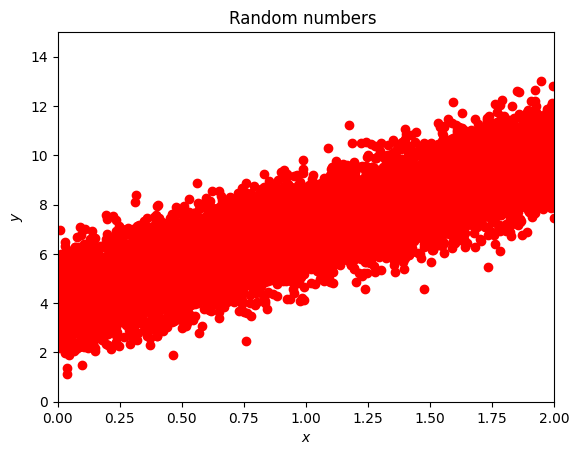

In [43]:
# stochastic gradient descent with mini batches and a given number of epochs.

%matplotlib inline
from math import exp, sqrt
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt

n = 10000 # --> we are using stochastic gradient descent with mini batches, so we can increase the number of observation to see the results
x = 2*np.random.rand(n,1)
y = 4+3*x+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x]
XT_X = X.T @ X
theta_linreg = np.linalg.inv(X.T @ X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)
# Hessian matrix
H = (2.0/n)* XT_X
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")

theta = np.random.randn(2,1)
eta = 1.0/np.max(EigValues)
Niterations = 1000

# Add mini baches and number of epochs
n_epochs = 50
M = 5                                  # size of each minibatch
m = int(n/M)                           # number of minibatches
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (2.0/M)* xi.T @ ((xi @ theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradients
print("theta from own sdg")
print(theta)

xnew = np.array([[0],[2]])
Xnew = np.c_[np.ones((2,1)), xnew]
ypredict = Xnew.dot(theta)

plt.plot(xnew, ypredict, "b-")
plt.plot(x, y ,'ro')
plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Random numbers ')
plt.show()

In [44]:
# AdaGrad and Stochastic Gradient descent with momentum 

from random import random, seed
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

### OLS ###
def CostOLS(y,X,theta):
    return np.sum((y-X @ theta)**2)

n = 1000
x = np.random.rand(n,1)
y = 2.0+3*x +4*x*x

X = np.c_[np.ones((n,1)), x, x*x]
XT_X = X.T @ X
theta_linreg = np.linalg.pinv(XT_X) @ (X.T @ y)
print("theta from OLS")
print(theta_linreg)

training_gradient = grad(CostOLS,2)
n_epochs = 50
M = 5                         # size of each minibatch
m = int(n/M)                  # number of minibatches
theta = np.random.randn(3,1)

eta = 0.01 # fixed

# Including AdaGrad parameter to avoid possible division by zero
delta  = 1e-8
for epoch in range(n_epochs):
    Giter = 0.0
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (1.0/M)*training_gradient(yi, xi, theta)
        Giter += gradients*gradients
        update = gradients*eta/(delta+np.sqrt(Giter))
        theta -= update
print("theta from OLS using AdaGrad")
print(theta)

### Ridge ###
Lambda  = 0.01
Id = n*Lambda* np.eye((X.T @ X).shape[0])
beta_Ridge = np.random.randn(3,1)
gradient = np.zeros(3)

for iter in range(Niterations):
    gradients = 2.0/n*X.T @ (X @ beta_Ridge-y)+2*Lambda*beta_Ridge
    beta_Ridge -= eta*gradients

print('theta from Ridge')
print(beta_Ridge)

# Including AdaGrad params
Giter_ridge = np.zeros((3, 1))
Niterations = 100

for iter in range(Niterations):
    gradients = (2.0 / n) * X.T @ (X @ beta_Ridge - y) + 2 * Lambda * beta_Ridge
    Giter_ridge += gradients ** 2                                       # Accumulate the squared gradients
    update = gradients * eta / (delta + np.sqrt(Giter_ridge))           # Adjust the update step
    beta_Ridge -= update                                                # Update the parameters

print('theta from Ridge using AdaGrad')
print(beta_Ridge)

theta from OLS
[[2.]
 [3.]
 [4.]]
theta from OLS using AdaGrad
[[1.99999518]
 [3.0000206 ]
 [3.99998015]]
theta from Ridge
[[2.1002544 ]
 [3.75558851]
 [2.54618112]]
theta from Ridge using AdaGrad
[[1.96811966]
 [3.88156866]
 [2.70641785]]


In [49]:
# RMSprop and ADAM

from random import random, seed
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

def CostOLS(y,X,theta):
    return np.sum((y-X @ theta)**2)

n = 1000
x = np.random.rand(n,1)
y = 2.0+3*x +4*x*x# +np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x, x*x]
XT_X = X.T @ X
theta_linreg = np.linalg.pinv(XT_X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)


### RMSprop ###
training_gradient = grad(CostOLS,2)
n_epochs = 50
M = 5
m = int(n/M)

theta_rmsprop = np.random.randn(3,1)
eta = 0.01
rho = 0.99
delta  = 1e-8

for epoch in range(n_epochs):
    Giter = 0.0
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (1.0/M)*training_gradient(yi, xi, theta_rmsprop)
        Giter = (rho*Giter+(1-rho)*gradients*gradients)        # Scaling with rho the new and the previous results
        update = gradients*eta/(delta+np.sqrt(Giter))          # Taking the diagonal only and inverting
        theta_rmsprop -= update                                        # Hadamard product
print("theta from own RMSprop")
print(theta_rmsprop)


### ADAM ###
# Value for parameters beta1 and beta2, see https://arxiv.org/abs/1412.6980
beta1 = 0.9
beta2 = 0.999
# Including AdaGrad parameter to avoid possible division by zero
delta  = 1e-7
iter = 0
theta_adam = np.random.randn(3,1)

for epoch in range(n_epochs):
    first_moment = 0.0
    second_moment = 0.0
    iter += 1
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (1.0/M)*training_gradient(yi, xi, theta_adam)
        # Computing moments first
        first_moment = beta1*first_moment + (1-beta1)*gradients
        second_moment = beta2*second_moment+(1-beta2)*gradients*gradients
        first_term = first_moment/(1.0-beta1**iter)
        second_term = second_moment/(1.0-beta2**iter)
	# Scaling with rho the new and the previous results
        update = eta*first_term/(np.sqrt(second_term)+delta)
        theta_adam -= update
print("theta from own ADAM")
print(theta_adam)

Own inversion
[[2.]
 [3.]
 [4.]]
theta from own RMSprop
[[1.99997347]
 [3.00032621]
 [3.99978415]]
theta from own ADAM
[[1.99998758]
 [3.00006405]
 [3.99995281]]


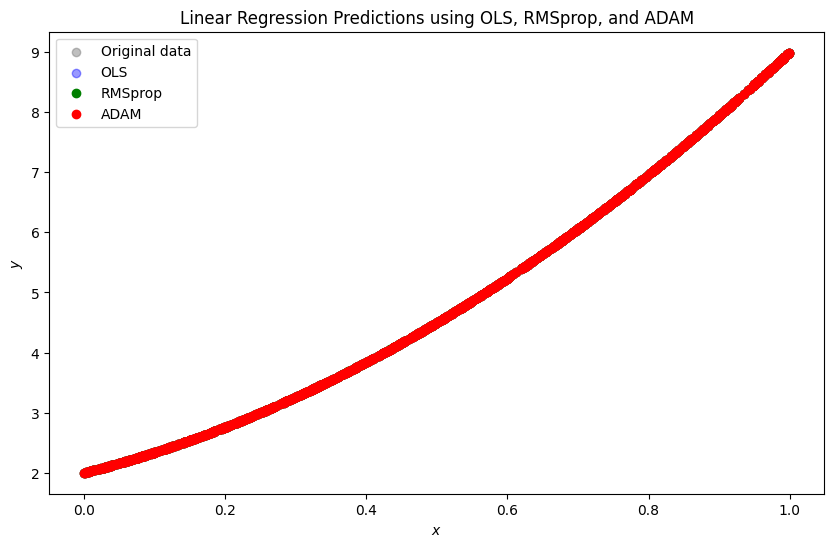

In [54]:
# Predicted values using different methods
y_pred_linreg = X @ theta_linreg
y_pred_rmsprop = X @ theta_rmsprop
y_pred_adam = X @ theta_adam

# Plot the results
plt.figure(figsize=(10, 6))

# Scatter plot of the original data
plt.scatter(x, y, color='gray', alpha=0.5, label='Original data')

# Line plot for each optimization method
plt.scatter(x, y_pred_linreg, label='OLS', color='blue', alpha = 0.4)
plt.scatter(x, y_pred_rmsprop, label='RMSprop', color='green')
plt.scatter(x, y_pred_adam, label='ADAM', color='red')

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Linear Regression Predictions using OLS, RMSprop, and ADAM')
plt.legend()
plt.show()

### Franke function

In [62]:
import numpy as np
from autograd import grad

# Define the Franke function
def FrankeFunction(x, y):
    term1 = 0.75 * np.exp(-(0.25 * (9*x - 2)**2) - 0.25*((9*y - 2)**2))
    term2 = 0.75 * np.exp(-((9*x + 1)**2)/49.0 - 0.1*(9*y + 1))
    term3 = 0.5 * np.exp(-(9*x - 7)**2/4.0 - 0.25*((9*y - 3)**2))
    term4 = -0.2 * np.exp(-(9*x - 4)**2 - (9*y - 7)**2)
    return term1 + term2 + term3 + term4

# Set random seed and initialize data
np.random.seed(2745)
n = 100                                      # Number of points
x = np.random.uniform(0, 1, n)
y = np.random.uniform(0, 1, n)
z = FrankeFunction(x, y) + 0.1 * np.random.normal(0, 1, n)

# Define function to create the design matrix
def design_matrix(x, y, degree):
    N = len(x)
    l = int((degree + 1) * (degree + 2) / 2)  # Number of terms in polynomial
    X = np.ones((N, l))  # Start with ones matrix
    idx = 1
    for i in range(1, degree + 1):
        for j in range(i + 1):
            X[:, idx] = (x**(i-j)) * (y**j)
            idx += 1
    return X

# Create design matrix for fifth-degree polynomial
degree = 5
X_manual = design_matrix(x, y, degree)

theta_ols = np.linalg.inv(X_manual.T @ X_manual) @ X_manual.T @ z
theta_ols = (theta_ols - np.mean(theta_ols)) / np.std(theta_ols)
print("Theta from OLS:")
print(theta_ols)

####

# OLS cost function compatible with autograd
def CostOLS(z, X_manual, theta):
    residuals = z - X_manual @ theta
    return np.dot(residuals, residuals)

# Set up gradient function using autograd
training_gradient = grad(CostOLS, 2)

####
# Stochastic Gradient Descent with Autograd
theta_sgd = np.random.randn(X_manual.shape[1])
eta_sgd = 0.01 # if the matrix is to big, its not convenient calculate the eigenvalues because they are instable (use eta 0.01, 0.001 fixed)
Niterations = 1000
for iter in range(Niterations):
    gradients_sgd = (1.0/M)*training_gradient(z, X_manual, theta_sgd)
    theta_sgd -= eta_sgd*gradients_sgd
print("theta from Stochastic Gradient Descent with Autograd")
print(theta_sgd)


### ADAM Optimization ###
# Hyperparameters for ADAM
n_epochs = 100
M = 10                         # Mini-batch size
m = int(n / M)
eta = 0.01                    # Learning rate
beta1 = 0.9
beta2 = 0.999
delta = 1e-7                  # Parameter to avoid division by zero

theta = np.random.randn(X_manual.shape[1])

for epoch in range(n_epochs):
    first_moment = 0.0
    second_moment = 0.0
    for i in range(m):
        # Select random mini-batch
        random_index = np.random.randint(0, n - M + 1)
        xi = X_manual[random_index:random_index + M]
        zi = z[random_index:random_index + M]
        # Compute gradients for the mini-batch
        gradients = (1.0/M) * training_gradient(zi, xi, theta)
        # Compute first and second moment estimates
        first_moment = beta1 * first_moment + (1 - beta1) * gradients
        second_moment = beta2 * second_moment + (1 - beta2) * (gradients ** 2)
        # Bias-corrected moment estimates
        first_moment_corrected = first_moment / (1.0 - beta1 ** (epoch + 1))
        second_moment_corrected = second_moment / (1.0 - beta2 ** (epoch + 1))
        # Update theta using ADAM update rule
        update = eta * first_moment_corrected / (np.sqrt(second_moment_corrected) + delta)
        theta -= update

print("Theta from own ADAM implementation:")
print(theta)

Theta from OLS:
[ 0.01147248  0.25015104  0.18630521 -1.00475567 -1.04563534 -0.31182033
  1.36769466  2.19501442  1.47011818 -0.36503114 -0.62392426 -1.89316324
 -1.71419443 -0.79798854  0.94313652 -0.02715309  0.75588701  0.35824995
  0.60368461  0.09684626 -0.4548943 ]
theta from Stochastic Gradient Descent with Autograd
[ 0.957846    0.22992352 -0.52486135 -1.8435509   0.51347206 -1.27561132
  0.04007761  0.35303365  0.73244935 -0.68831284  1.50124065  1.66821945
 -1.19573254 -0.9525243   2.11241112 -0.93530613 -0.11980905  0.47204114
 -1.14798806  0.25791582 -0.09468463]
Theta from own ADAM implementation:
[ 0.72508293  0.27860051  0.8452926  -0.6242064  -0.52909528 -3.04475822
 -0.49364495  0.69599764 -1.51835117  0.78864778 -0.36298252  0.96812271
  0.3497855   0.86062083  1.7200484   0.44236876  0.66910068 -0.76889144
 -0.40598484  0.23239775 -0.57377094]


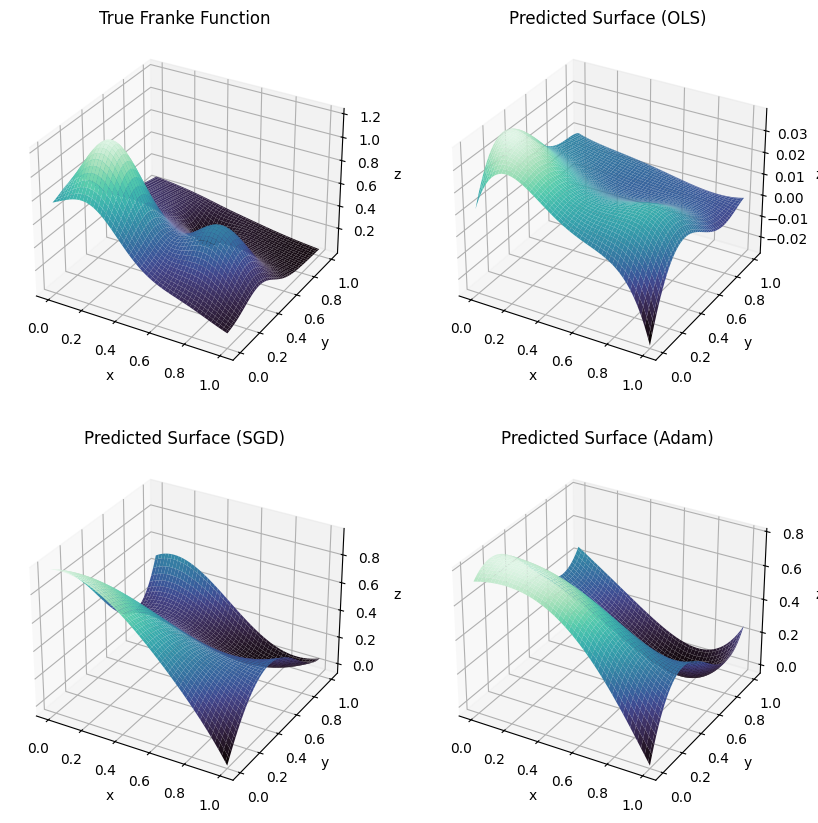

In [63]:
x_grid = np.linspace(0, 1, 100)
y_grid = np.linspace(0, 1, 100)
x_mesh, y_mesh = np.meshgrid(x_grid, y_grid)
x_flat = x_mesh.flatten()
y_flat = y_mesh.flatten()
X_grid = design_matrix(x_flat, y_flat, degree)

# Predicted values
z_pred_ols = X_grid @ theta_ols
z_pred_ols = z_pred_ols.reshape(x_mesh.shape)

z_pred_sgd = X_grid @ theta_sgd
z_pred_sgd = z_pred_sgd.reshape(x_mesh.shape)

z_pred_Adm = X_grid @ theta
z_pred_Adm = z_pred_Adm.reshape(x_mesh.shape)

z_true = FrankeFunction(x_mesh, y_mesh)


fig = plt.figure(figsize=(10,10))
# Plot 1
ax1 = fig.add_subplot(221, projection='3d')
ax1.plot_surface(x_mesh, y_mesh, z_true, cmap='mako')
ax1.set_title('True Franke Function')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

# Plot 2
ax2 = fig.add_subplot(222, projection='3d')
ax2.plot_surface(x_mesh, y_mesh, z_pred_ols, cmap='mako')
ax2.set_title('Predicted Surface (OLS)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')

# Plot 3
ax2 = fig.add_subplot(223, projection='3d')
ax2.plot_surface(x_mesh, y_mesh, z_pred_sgd, cmap='mako')
ax2.set_title('Predicted Surface (SGD)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')

# Plot 4
ax2 = fig.add_subplot(224, projection='3d')
ax2.plot_surface(x_mesh, y_mesh, z_pred_Adm, cmap='mako')
ax2.set_title('Predicted Surface (Adam)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')

plt.show()